$$\bf{\text{Boosting}}$$

### What is Boosting?

> Boosting is an ensemble learning method that combines a set of weak learners into a strong learner to minimize training errors. - *IBM*

> Boosting works in a similar way, except that the trees are grown sequentially: each tree is grown using information from previously grown trees. Boosting does not involve bootstrap sampling; instead each tree is fit on a modified version of the original data set. - *An Introduction to Statistical Learning*

> Boosting (originally called hypothesis boosting) refers to any Ensemble method that can combine several weak learners into a strong learner. The general idea of most boosting methods is to train predictors sequentially, each trying to correct its prede‐ cessor. - *Hands-on Machine Learning*

**A quick review on bagging**

Before entering into the new topic, let's quick review bagging. Bagging involves creating multiple copies of original training set using the bootstrap sampling technique, fitting separate decision tree on each of the bootstrapped dataset in parallel, and then combining all of these trees to generate one more accurate model. Although working in a similar way that train multiple trees and combine them to one single model, boosting grow trees not in parallel but sequentially. Also, boosting does not involve bootstrap sampling; instead, each tree is fit on the modified version of original train set.

Now let's define boosting. **Like bagging, boosting is also an ensemble method that can combine several weak learners into a stronger learner. In bagging, samples are randomly selected and fitted with decision tress sequentially - that is, each tree tries to compensate the weakness of its predecessor.**

**Ensemble Learning**

根据上述定义，我们可以总结出集成学习的概念。无论是bagging还是boosting,两者核心的方法都是通过合并一系列weak learners以生成一个更加强劲的模型。集成学习的概念启发于“集体的力量”的思想：一个团队的决策通常优于一个专家的决策。如果我们只是构建一个weak learner或者model, 这个模型可能因为比较高的variance或者bias导致预测的结果不理想，但是如果我们将一群weak learners进行聚合，就可以发挥出”集体的智慧“，从而产生更好的预测结果。

其次，集成式学习方法通常会将决策树作为weak learner，因为决策树有着高variance容易产生过度拟合的特征，如果我们没有对决策树进行剪枝。同时，如果决策树的深度不够，决策树又非常容易产生欠拟合的问题，例如decision stump。那么，无论是过度拟合还是欠拟合，集成式模型都可以弥补单一模型在拟合新数据时表现不佳的缺点。

### Bagging Versus Boosting

现在，在充分了解了boosting的概念后，我们来将bagging和boosting进行全方位的对比。这两个集成式模型到底有哪些差异？

Bagging和Boosting两者的差异主要体现在如下几个方面：

- **训练模型的方式。**Bagging的运作是运用Bootsrtap sampling technique产生多个训练集，然后同时用这些训练集创建weak learner，例如决策树。最后，将模型进行合并产生出强劲的集成模型。但是，Boosting并不使用bootstrap sampling technique进行数据集的创建。相反，Boosting会直接使用整个train set按照一定的先后顺序训练模型。
- **运用的时机不同。**如果单一模型有高variance和低bias的问题，我们应该使用bagging方法来减少单一模型的variance提升模型的整体性能。然而，如果单一模型有高bias但是低variance的问题时，我们应该使用boosting方法减少模型的bias，提升模型的整体性能。
- **运用的现实场景不同。**Bagging通常用于银行贷款风险评估，而Boosting通常被用于图片识别和搜索引擎场景。

### Types of Boosting

Boosting根据运行方式的变化催生出不同的类型，比较主流的Boosting方法包括Adboost和Gradient Boost。这两个Boosting方法在创建和聚合weak learners上有差异，所以在这里分开讲解。

#### Adboost

> To build an AdaBoost classifier, a first base classifier (such as a Decision Tree) is trained and used to make predictions on the training set. The relative weight of misclassified training instances is then increased. A second classifier is trained using the updated weights and again it makes predictions on the training set, weights are updated, and so on. - *Hands-on Machine Learning*

> AdaBoost also called Adaptive Boosting is a technique in Machine Learning used as an Ensemble Method. The most common algorithm used with AdaBoost is decision trees with one level that means with Decision trees with only 1 split. These trees are also called Decision Stumps. - *Analytics Vidhya*

> This method operates iteratively, identifying misclassified data points and adjusting their weights to minimize the training error. The model continues optimize in a sequential fashion until it yields the strongest predictor. - *IBM*

根据上述三个定义，我们可以自主给出adboost的定义，这里为使用英文撰写：

Adboost, which is also known as adaptive boosting, is best used for classification rather than regression. Using decision tress with only one level, which is called decision stump, as the base learner, adboost assigns higher weights to misclassified samples but lower weights to correctly classified samples in each iteration where it creates new dataset and trains a new model. The two steps are repeated until the error is minimized or we find the best predictor.

针对Adboost的理解，我们需要记住的是：1)Adboost使用**decision stump**作为base learner 2)Adboost在每次迭代时会不断更新每一个样本的**权重**，体现在**增加**错误分类的样本的权重，而**减少**正确分类的样本的权重。

**How Adboost Works?**

<img src="https://i.stack.imgur.com/lEkaB.png width=100">

根据上述算法图，Adboost算法的运行流程为以下六个步骤：

- **创建第一个Base Learner**在这一步中，Adboost会创建与input features同等数量的decision stumps，然后计算每个stumps的Gini或者Entropy。计算完毕后，adboost会挑选Gini或者Entropy数值最低的decision stump作为base learner。这里需要说明的是，因为每一个decision stump只选用一个特征进行spliting，所以每个deicion stump就代表一个特征。
- **计算总体误差(Total Error)。**鉴于某一个decision stump被选择，我们需要衡量这个decision stump的预测表现。总体差误差是每个被错误分类的样本的权重之和，计算公示为:$TE = \sum_{i=1}^nw_i[h_i(x)\neq y_i]$（N为被错误分类的总样本量）.
- **计算base learner的“amount of say”。** **amount of say**的计算公式为：$\alpha = \delta \ln{\frac{1-TE}{TE}}$。$\delta$代表*learning rate*，通常取0.5。
- **更新样本权重。**对于错误分类的样本，为了让新模型更多地关注这些样本，Adboost增加这些样本的权重；相反，对于分类正确的样本，Adboost减少这些样本的权重。这样一来，每次迭代过程中，新模型都是在弥补旧模型的缺陷。更新样本权重的公式为：

$$\text{new weight} = \begin{cases}
\text{sample weight} \times e^{\text{amount of say}} & \text{if instance is incorrectly classified}\\
\text{sample weight} \times e^{-\text{amount of say}} & \text{if instance is correctly classified}
\end{cases}$$

- **正态化本权重。**因为权重之和必须为1，所以adboost会将每个样本进行正态化：将每个样本权重除以总体样本权重之和。
- **构建新的数据集。**根据样本权重，将样本数据拆分成多个数据桶。随机选择从0到1的浮点数，如果浮点数落在某个数据桶内，则选取该样本。这个过程会不断循环直到该数据集总体的样本量于原数据总体样本量相等。**其次，权重大的样本出现的次数会最高。**
- **重复前面的步骤。**

##### Example of Adboost

举一个案例来演示Adboost算法的整体运行逻辑。这里采用手算和代码结合的形式。现假设我们有如下数据集：

| Chest Pain | Blocked Arteries | Patient Weight| Heart Disease|
|-------------|------|------|------|
| Yes          | Yes  |205|Yes|
| No      | Yes  |180|Yes|
| Yes      | No  |210|Yes|
| Yes      | Yes  |167|Yes|
| No      | Yes  |156|Yes|
| No      | Yes  |125|No|
| Yes      | No  |168|No|
| Yes      | Yes  |172|No|

`Heart Disease`为响应变量，其余的为预测变量。

###### Step1 : Initialize and make first stump

这一步，给予每个数据样本同等大小的权重。如下图所示：

| Chest Pain | Blocked Arteries | Patient Weight| Heart Disease|weight|
|-------------|------|------|------|------|
| Yes          | Yes  |205|Yes|$\frac{1}{8}$|
| No      | Yes  |180|Yes|$\frac{1}{8}$|
| Yes      | No  |210|Yes|$\frac{1}{8}$|
| Yes      | Yes  |167|Yes|$\frac{1}{8}$|
| No      | Yes  |156|Yes|$\frac{1}{8}$|
| No      | Yes  |125|No|$\frac{1}{8}$|
| Yes      | No  |168|No|$\frac{1}{8}$|
| Yes      | Yes  |172|No|$\frac{1}{8}$|

随后，我们需要构建第一个decision stump。这里假设我们选取Gini作为划分决策树节点的依据，计算三个变量的Gini系数值。我们以Chest Pain为演示目标：

$$Gi = 1-\sum_{i=1}^nP_{i,k}^2$$

这里，我用第一个特征`chest pain`创建一个decision stump:

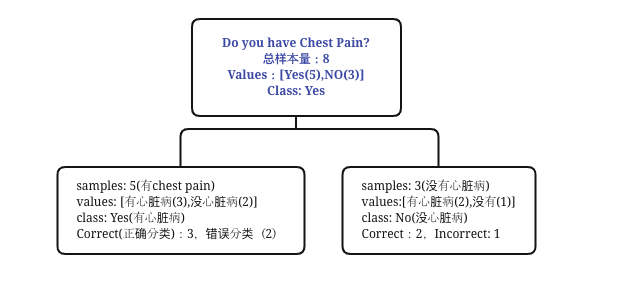

然后，我们计算这个decision stump的Gini系数值：

$Gi_{root} = 1 - \frac{3}{8}^2 - \frac{5}{8}^2 = 0.469$

$Gi_{\text{right node}} = 1 - \frac{1}{3}^2 - \frac{2}{3}^2 = 0.444$

$Gi_{\text{left node}} = 1 - \frac{2}{5}^2 - \frac{3}{5}^2 = 0.48$

$Gi = 0.469 + \frac{3}{8}\times 0.444 + \frac{5}{8}\times 0.48 = 0.9355$

计算完毕后，选用第二个特征划分训练集，创建第二个decision stump。这里由于手算费时间，并且计算逻辑完全一致，因此我改用代码完成计算。如下所示：

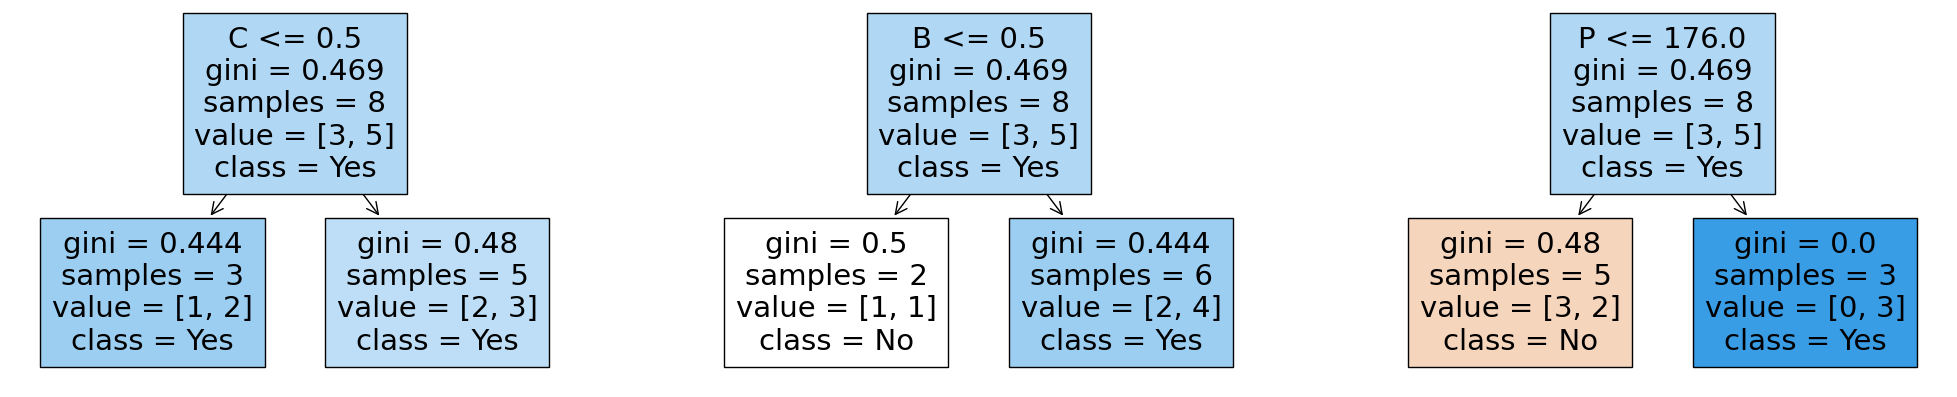

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

# create the dataframe
df = pd.DataFrame({"ChestPain":[1,0,1,1,0,0,1,1],
                       "BlockedArteries":[1,1,0,1,1,1,0,1],
                       "PatientWeight":[205,180,210,167,156,125,168,172],
                       "Heart Disease":[1,1,1,1,1,0,0,0]})

target_names = ["No","Yes"]

fig,ax = plt.subplots(1,3,figsize=(25,5),dpi=100)
for i in range(3):
    x = np.array(df.iloc[:,i]).reshape(-1,1)
    y = df["Heart Disease"]
    tree_clf = DecisionTreeClassifier(max_depth=1)
    tree_clf.fit(x,y)
    
    tree.plot_tree(tree_clf,
                  feature_names=df.columns[i],
                  class_names=target_names,
                  filled=True,
                  ax=ax[i])
plt.show()

In [3]:
gini_C = 0.469 + 0.444*3/8 + 0.48*5/8
gini_B = 0.469 + 0.5*2/8 + 0.444*6/8
gini_P = 0.469 + 0.48*5/8
ginis = [gini_C,gini_B,gini_P]
print(ginis)

[0.9355, 0.927, 0.7689999999999999]


基于计算结果，使用Patient Weight划分数据集得出的Gini系数最小，所以我们决定使用`Patient Weight`作为第一个decision stump。

###### Step 2: Calculate Total Error

Total error is just the summation of weights associated with samples that are incorrectly misclassified.

$$TE = \sum_{i=1}^nw_i[h_i(x)\neq y_i]$$

以Patient Weight构建的decision stump有两个错误预测。所以可以得出：TE = $2\times \frac{1}{8} = \frac{1}{4}$.

###### Step 3: Calculate Amount of Say

Amount of say measures how much a decision tree weights. Adboost uses total error to calculate the amount of say:

$$\alpha = \delta \ln{\frac{1-TE}{TE}}$$

- $\delta$ is usually set to 0.5

为了更好地理解`Amount of Say`与`Total Error`之间的关系，来看下方的曲线图：

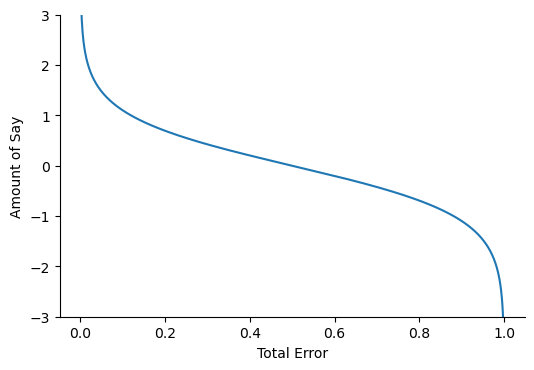

In [74]:
x = np.linspace(0,1,1000)
y = 0.5*np.log((1-x)/x)

fig,ax = plt.subplots(1,1,dpi=100)
sns.lineplot(x,y,ax=ax)
ax.set_ylim([-3,3])
for spine in ["right","top"]:
    ax.spines[spine].set_visible(False)
ax.set_xlabel("Total Error",fontsize=10)
ax.set_ylabel("Amount of Say",fontsize=10)
plt.show()

- 如果decision stump的预测结果准确，则Total Error就会接近于0，这时该decision stump的Amount of say就会很大，不断接近于3
- 如果decision stump的预测与抛一枚硬币随机猜测的结果接近，则Total Error就会接近0.5，这时decision tree的Amount of say等于0
- 如果decision stump的预测每次都是给出相反的结果，则Total Error会等于1，这时单层决策树的amount of say等于-3

现在，我们来计算刚刚创建的单层决策树的`amount of say`:

Amount of Say = $\frac{1}{2} \log{\frac{1-TE}{TE}}$ = $\frac{1}{2} \log{\frac{\frac{3}{4}}{\frac{1}{4}}} = 0.549$

###### Step 4: Update Sample Weight

在这一步，我们根据以上的计算结果修正每个样本的权重，以至于构建新的单层决策树会考虑到第一个模型的错误。对于不同的预测结果，样本权重处理的方式不同，处理逻辑如下：

$$w_{i+1} = \begin{cases}
w_i \times e^{\text{amount of say}}& h(x^i) \neq y^i\\
w_i \times e^{-\text{amount of say}}& h(x^i) = y^i
\end{cases}
$$

所以我们可以为正确分类的样本以及错误分类的样本计算出新的权重：

- **InCorrectly Classified Instances** $w_{i+1} = \frac{1}{8} \times e^{0.549} = 0.216$
- **correctly Classified Instances** $w_{i+1} = \frac{1}{8} \times e^{-0.549} = 0.072$

为了更好地理解该公式如何修正样本的权重，我们来瞧一瞧下方的曲线图：

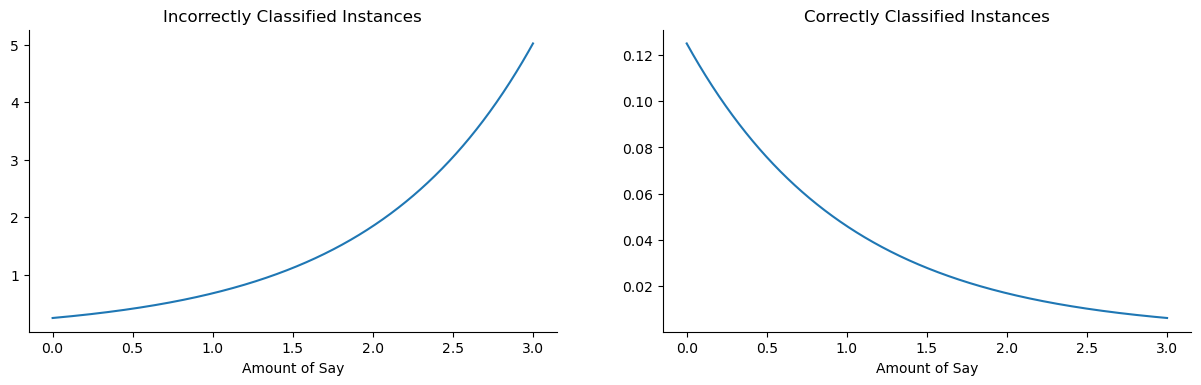

In [195]:
x = np.linspace(0,3,1000)
y = 1/4*np.exp(x)

fig,ax = plt.subplots(1,2,figsize=(15,4),dpi=100)
sns.lineplot(x,y,ax=ax[0])
for spine in ["right","top"]:
    ax[0].spines[spine].set_visible(False)
ax[0].set_xlabel("Amount of Say",fontsize=10)
ax[0].set_title("Incorrectly Classified Instances")

y1 = 1/8*np.exp(-x)
sns.lineplot(x,y1,ax=ax[1])
for spine in ["right","top"]:
    ax[1].spines[spine].set_visible(False)
ax[1].set_xlabel("Amount of Say",fontsize=10)
ax[1].set_title("Correctly Classified Instances")
plt.show()

公式对样本权重进行modification的逻辑如下：

**分类错误的样本：**

- 当创建的单层决策树的`amount of say`很大的时候，左边的右上方倾斜的曲线在y轴对应的值越大，样本的权增加越多
- 当创建的单层决策树的`amount of say`很小的时候，左边的右上方倾斜的曲线在y轴对应的值越小，样本的权增加越小

**分类正确的样本：**

- 当创建的单层决策树的`amount of say`很大的时候，右边的右下方倾斜的曲线在y轴对应的值越小，被正确分类的样本的权重减少的越小
- 当创建的单层决策树的`amount of say`很小的时候，右边的右下方倾斜的曲线在y轴对应的值越大，被正确分类的样本的权重减少的越多

###### Step 5: Normalize the Updated Sample Weighs

因为样本权重之和必须为1，所以我们需要对更新后的样本权重进行正态化：

$$w_i(normalize) = \frac{w_i}{\sum_{i=1}^nw_i}$$

具体运算过程如下方代码所示：

In [8]:
# add one column to represent equally distributed sample weight
df["weight"] = 1/8
# Obtian the prediction of decision tree
df["prediction"] = tree_clf.predict(np.array(df.iloc[:,2]).reshape(-1,1))
# update the sample weight
df["Updated Weight"] = np.where(df["prediction"]==df["Heart Disease"],0.072,0.216)
# normalize the updated weight
df["normalized_weight"] = df["Updated Weight"]/df["Updated Weight"].sum()
# display the result
display(df)

,ChestPain,BlockedArteries,PatientWeight,Heart Disease,weight,prediction,Updated Weight,normalized_weight,temp,data_bins
0,1,1,205,1,0.125,1,0.072,0.083333,0.083333,"[0,0.08]"
1,0,1,180,1,0.125,1,0.072,0.083333,0.166667,"[0.08,0.17]"
2,1,0,210,1,0.125,1,0.072,0.083333,0.250000,"[0.17,0.25]"
3,1,1,167,1,0.125,0,0.216,0.250000,0.500000,"[0.25,0.5]"
4,0,1,156,1,0.125,0,0.216,0.250000,0.750000,"[0.5,0.75]"
5,0,1,125,0,0.125,0,0.072,0.083333,0.833333,"[0.75,0.83]"
6,1,0,168,0,0.125,0,0.072,0.083333,0.916667,"[0.83,0.92]"
7,1,1,172,0,0.125,0,0.072,0.083333,1.000000,"[0.92,1.0]"


##### Step 6: Binning the normalized weight

根据正态化后的样本权重进行随机抽样，创建一个于原数据集一样size的数据集。Adboost会首先为normalized_weight创建数据桶，然后随机生成一系列位于0到1之间的数字，根据数字于数据桶之间的映射关系，挑选出对应的样本。

*创建数据桶*

In [5]:
df['temp'] =  df["normalized_weight"].cumsum()

def get_data_bins(ser):
    """create data bins"""
    res = []
    data_bins = [round(i,2) for i in ser.tolist()]
    for index,val in enumerate(data_bins):
        if index == 0:
            x = f"[0,{val}]"
            res.append(x)
        else:
            x = f"[{data_bins[index-1]},{data_bins[index]}]"
            res.append(x)
    return res

df['data_bins'] = get_data_bins(df["temp"])
display(df['data_bins'].to_frame())

,data_bins
0,"[0,0.08]"
1,"[0.08,0.17]"
2,"[0.17,0.25]"
3,"[0.25,0.5]"
4,"[0.5,0.75]"
5,"[0.75,0.83]"
6,"[0.83,0.92]"
7,"[0.92,1.0]"


使用抽样函数随机抽选8个位于0到1之间的数字

In [6]:
import random

random.seed(42)
random_numbers = []
for i in range(8):
    print(random.uniform(0,1),end=" ")
    random_numbers.append(i)

0.6394267984578837 0.025010755222666936 0.27502931836911926 0.22321073814882275 0.7364712141640124 0.6766994874229113 0.8921795677048454 0.08693883262941615 

- 0.639对应index为4的数据记录，所以我们抽选这条数据作为新数据集的第一个观测
- 0.025对应index为0的数据记录，所以我们抽选这条数据作为新数据集的第二个观测
- 0.275对应index为3的数据记录，所以我们抽选这条数据作为新数据集的第三个观测
- 0.223对应index为2的数据记录，所以我们抽选这条数据作为新数据集的第四个观测
- 0.736对应index为4的数据记录，所以我们抽选这条数据作为新数据集的第五观测
- 0.676对应index为4的数据记录，所以我们抽选这条数据作为新数据集的第六个观测
- 0.892对应index为6的数据记录，所以我们抽选这条数据作为新数据集的第七个观测
- 0.086对应index为0的数据记录，所以我们抽选这条数据作为新数据集的最后一个观测

In [7]:
# wrap up these random numbers by list
random_indexes = [4,0,3,2,4,4,6,0]
# create the new dataset
new_df = pd.DataFrame()
for index in random_indexes:
    row = df.iloc[index,:].to_frame().T
    new_df = pd.concat([new_df,row],axis=0)
new_df = new_df.iloc[:,:4]
display(new_df)

,ChestPain,BlockedArteries,PatientWeight,Heart Disease
4,0,1,156,1
0,1,1,205,1
3,1,1,167,1
2,1,0,210,1
4,0,1,156,1
4,0,1,156,1
6,1,0,168,0
0,1,1,205,1


错误的样本在新的数据中出现4次。因为被错误分类的样本权重更高，所以选中这些样本的概率就会更高。

随后，Adboost会从第一步开始进行迭代，直至我们找到最优的predictor。

**Note: 我这里在创建新的数据集时只是大概演示了一遍Adboost在创建新数据集时的运行逻辑，可能有不准确之处。**

##### Lab

$\color{crimson}{\text{Lab部分基本为代码，所以这里全部用英文写作}}$

###### Build Adboost Model

Now, we will use Adboost for classificaion problem. I will make a binary dataset with 1000 observations and 20 input features using `make_classificaiton` function.

> Scikit-Learn uses a multiclass version of AdaBoost called SAMME16 (which stands for Stagewise Additive Modeling using a Multiclass Exponential loss function). When there are just two classes, SAMME is equivalent to AdaBoost. Moreover, if the predictors can estimate class probabilities (i.e., if they have a predict_proba() method), Scikit-Learn can use a variant of SAMME called SAMME.R (the R stands for “Real”), which relies on class probabilities rather than predictions and generally performs better. - *Hands-on Machine Learning*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import make_classification

# crate the dataset
X,y = make_classification(n_samples=1000,n_features=20,n_informative=15,
                   n_redundant=5,random_state=1)
# look at the shape
print(X.shape,y.shape)

(1000, 20) (1000,)


In [162]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
# build adboost forest
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=0.5)

# create the cross validator
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=2,random_state=1)
cv_scores = cross_val_score(ada_clf,X,y,cv=cv,scoring="accuracy")

# display the result
print(f"Accuracy:{round(np.mean(cv_scores),3)}({round(np.std(cv_scores),3)})")

Accuracy:0.868(0.031)


###### Hyperparameter Tuning

IN scikit-learn, the number of estimators corresponds to `n_estimators`.

In this section, we will explore a number of hyperparameters that are quite important for adboost.

###### Numebr of Trees

As mentioned above, adboost will build a new tree that takes the error made by its predecessor into account so that the new model will focus more on these error. And the process will repeat until we find the best predictor. So the question is **"How many times do we need the algorithm to iterate?"** or **"How many trees should adboost build?"**

The rule of thumb is that we should build hundreds of trees, but the number still depends on the dataset we are working on. Now let's look at the change in performance when we change the number of trees.

In [164]:
def get_dataset():
    """Construct the dataset about binary problem"""
    X,y = make_classification(n_samples=1000,n_features=20,
               n_informative=15,n_redundant=5,random_state=1)
    return X,y

def build_models():
    """Build Adboost Model with different number of Trees"""
    models = dict()
    n_trees = [10,50,100,200,300,500,1000]
    for n in n_trees:
        models[str(n)] = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                            n_estimators=n)
    return models

def evaluate_models(model,X,y):
    """Evaluate the performance of Bagging Models"""
    cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=2,random_state=1)
    cv_scores = cross_val_score(model,X,y,scoring="accuracy",cv=cv)
    return cv_scores

# get the dataset
X, y = get_dataset()
# get models
adboost_models = build_models()
# evaluate models
results,names = [],[]
for name,model in adboost_models.items():
    names.append(name)
    results.append(evaluate_models(model,X,y))
    
# let's look at the results

for index,result in enumerate(results):
    print(f"Number of Trees {names[index]}: {round(np.mean(result),3)} {round(np.std(result),3)}")

Number of Trees 10: 0.809 0.016
Number of Trees 50: 0.857 0.026
Number of Trees 100: 0.862 0.027
Number of Trees 200: 0.863 0.02
Number of Trees 300: 0.861 0.02
Number of Trees 500: 0.862 0.022
Number of Trees 1000: 0.854 0.019


Now Let's look at the distribution of scores for adboost with different number of trees.

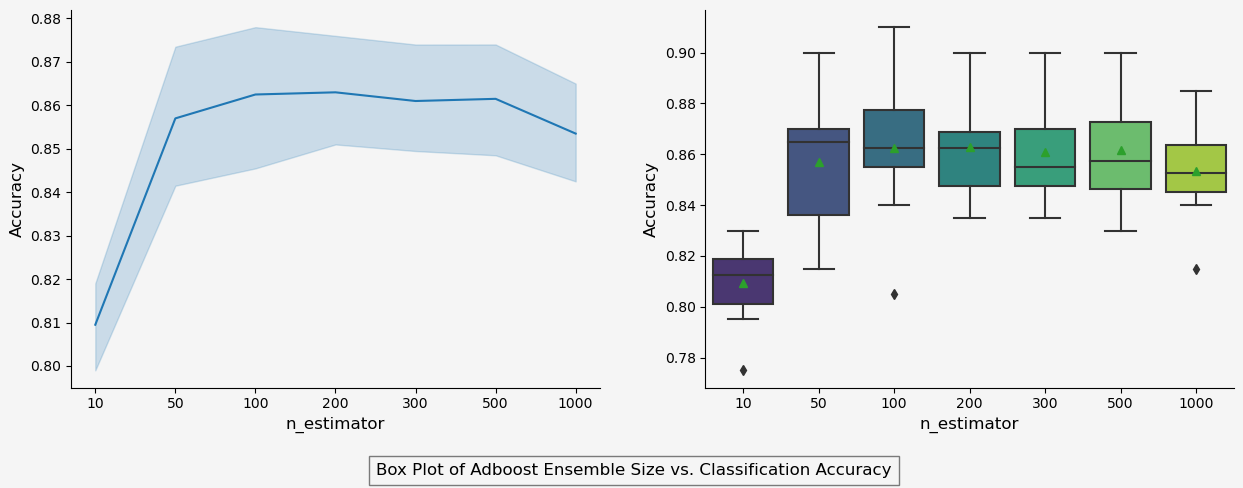

In [167]:
temp = pd.DataFrame(results).T
temp.columns = names
temp_melt = pd.melt(temp,value_vars=["10","50","100","200","300","500","1000"],var_name="model",value_name="result")


# visualize the results
fig,ax = plt.subplots(1,2,figsize=(15,5),dpi=100,facecolor='whitesmoke')
sns.lineplot(data=temp_melt,x="model",y='result',estimator=np.mean,ax=ax[0])
ax[0].set_facecolor("whitesmoke")
ax[0].set_xlabel('n_estimator',fontsize=12)
ax[0].set_ylabel('Accuracy',fontsize=12)
for spine in ["right",'top']:
    ax[0].spines[spine].set_visible(False)

sns.boxplot(data=temp_melt,x="model",y="result",palette="viridis",ax=ax[1],showmeans=True)
ax[1].set_facecolor("whitesmoke")
ax[1].set_xlabel('n_estimator',fontsize=12)
ax[1].set_ylabel('Accuracy',fontsize=12)
for spine in ["right",'top']:
    ax[1].spines[spine].set_visible(False)

plt.figtext(0.5, -0.05, "Box Plot of Adboost Ensemble Size vs. Classification Accuracy", ha="center", fontsize=12, bbox={"facecolor":"whitesmoke", "alpha":0.5, "pad":5})
plt.show()

Based on the result, the performance of adboost model begins to flat after `n_estimators` of 100. This indicates that the model made by current dataset will suffer from overfitting if addtional trees are added.

###### Learning Rate

Recall how we calculate amount of say for one decision stump:

$$\alpha = \delta \times \log{\frac{1-\text{total error}}{\text{total error}}}$$

Higher learning rate means that amount of say will be greater. As a result of this, the updated weight associated with misclassified samples is higher, indictating that they are more likely to be selected when adboost creates a new dataset. Hence, adboost algorithm is highly likely to learn these error too well; in other words, the model is likely to overfit.

**How we set the value for learning rate?**

> The learning_rate hyperparameter scales the contribution of each tree. If you set it to a low value, such as 0.1, you will need more trees in the ensemble to fit the training set, but the predictions will usually generalize better. This is a regularization tech‐ nique called shrinkage. - *Hands-on Machine Learning*

Let's try to iterate the model with learning rate ranging from small values to large ones.

In [170]:
def get_dataset():
    """Construct the dataset about binary problem"""
    X,y = make_classification(n_samples=1000,n_features=20,
               n_informative=15,n_redundant=5,random_state=1)
    return X,y

def build_models():
    """Build Adboost Model with different learning rate"""
    models = dict()
    for n in np.arange(0.1,2.1,0.1):
        models[str(n)] = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                            n_estimators=100,
                                           learning_rate=n)
    return models

def evaluate_models(model,X,y):
    """Evaluate the performance of Bagging Models"""
    cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=2,random_state=1)
    cv_scores = cross_val_score(model,X,y,scoring="accuracy",cv=cv)
    return cv_scores

# get the dataset
X, y = get_dataset()
# get models
adboost_models = build_models()
# evaluate models
results,names = [],[]
for name,model in adboost_models.items():
    names.append(name)
    results.append(evaluate_models(model,X,y))
    
# let's look at the results

for index,result in enumerate(results):
    print(f"Learning Rate {round(float(names[index]),1)}: {round(np.mean(result),3)} {round(np.std(result),3)}")

Learning Rate 0.1: 0.834 0.025
Learning Rate 0.2: 0.856 0.023
Learning Rate 0.3: 0.859 0.022
Learning Rate 0.4: 0.866 0.028
Learning Rate 0.5: 0.874 0.021
Learning Rate 0.6: 0.869 0.025
Learning Rate 0.7: 0.862 0.026
Learning Rate 0.8: 0.869 0.028
Learning Rate 0.9: 0.866 0.028
Learning Rate 1.0: 0.862 0.027
Learning Rate 1.1: 0.863 0.022
Learning Rate 1.2: 0.857 0.031
Learning Rate 1.3: 0.859 0.019
Learning Rate 1.4: 0.856 0.035
Learning Rate 1.5: 0.849 0.027
Learning Rate 1.6: 0.842 0.027
Learning Rate 1.7: 0.852 0.025
Learning Rate 1.8: 0.826 0.031
Learning Rate 1.9: 0.817 0.027
Learning Rate 2.0: 0.556 0.102


Same Old, let's visualize the change in scores with changing learning rate.

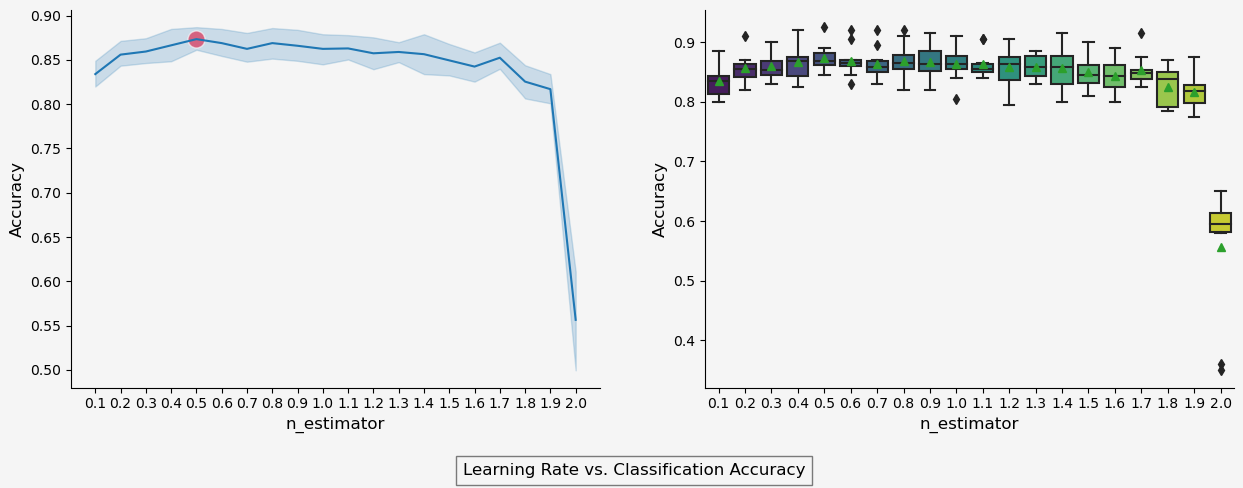

In [192]:
temp = pd.DataFrame(results).T
temp.columns = [str(round(i,1)) for i in np.arange(0.1,2.1,0.1)]
temp_melt = pd.melt(temp,value_vars=[str(round(i,1)) for i in np.arange(0.1,2.1,0.1)],var_name="model",value_name="result")
temp_melt["model"] = temp_melt.model.apply(lambda x:float(x))
# visualize the results
fig,ax = plt.subplots(1,2,figsize=(15,5),dpi=100,facecolor='whitesmoke')
sns.lineplot(data=temp_melt,x="model",y='result',estimator=np.mean,ax=ax[0])
y_ = [temp["0.5"].mean()]
max_score = pd.DataFrame({"x_":[0.5],"y_":y_})
sns.scatterplot(data=max_score,x="x_",y="y_",color="crimson",s=150,alpha=0.6,ax=ax[0])
ax[0].set_facecolor("whitesmoke")
ax[0].set_xlabel('n_estimator',fontsize=12)
ax[0].set_ylabel('Accuracy',fontsize=12)
ax[0].xaxis.set_ticks(np.arange(0.1, 2.1,0.1))
for spine in ["right",'top']:
    ax[0].spines[spine].set_visible(False)

sns.boxplot(data=temp_melt,x="model",y="result",palette="viridis",ax=ax[1],showmeans=True)
ax[1].set_facecolor("whitesmoke")
ax[1].set_xlabel('n_estimator',fontsize=12)
ax[1].set_ylabel('Accuracy',fontsize=12)
for spine in ["right",'top']:
    ax[1].spines[spine].set_visible(False)

plt.figtext(0.5, -0.05, "Learning Rate vs. Classification Accuracy", ha="center", fontsize=12, bbox={"facecolor":"whitesmoke", "alpha":0.5, "pad":5})
plt.show()

The plot shows that accuracy of adboost starts to reduce afer learning rate of 0.5, indicating that higher learning rate will make adboost overfit. In this case, the best value of learning rate is 0.5.

#### Gradient Boosting

**What is Gradient Boosting?**

> Just like AdaBoost, Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the residual errors made by the previous predictor. - *Hands-on Machine Leaarning*

> Building on the work of Leo Breiman, Jerome H. Friedman developed gradient boosting, which works by sequentially adding predictors to an ensemble with each one correcting for the errors of its predecessor. However, instead of changing weights of data points like AdaBoost, the gradient boosting trains on the residual errors of the previous predictor. The name, gradient boosting, is used since it combines the gradient descent algorithm and boosting method. - *IBM*

After reading the two definitions, I can give my own understanding for *Gradient Boosting*:

Like Adboost, Gradient Boosting, developed by Jerome H. Friedman, works by sequentially adding predictors to an ensemble model, which is just a group of models, each one correcting the errors for its predecessor. However, gradient boosting focuses not on updating/tweaking the weights of instances but on training a new predictor on the residual errors made by the previous model.

**How Gradient Boosting Works?**

<img src="https://liyanxu.blog/wp-content/uploads/2018/10/Screen-Shot-2018-10-30-at-22.45.44.png">

So we can summarize the algorithm as the following steps:

Denotation:
- $\{x_i,y_i\}$ refers to one training instance
- $\gamma_i$ is the hypothesized form of function
- $L(y_i,\gamma_i)$ is the loss function

**step 0: Define Loss Function**

Loss function is usually used for parameter estimation. Here, to find the optimal value of prediction, we need loss function for the problem of optimization. It is defined as:

$$J(y_i,\gamma) = \min{\frac{1}{2n}\sum_{i=1}^n(\gamma - y_i)^2}$$

- $\gamma_i$ is the predicted value
- $y_i$ is the actual value

Hence, we need to find a predicted $h(x)$ that is as close to $y_i$ as possible for all data points so that the summation of the differnce between $h(x_i)$ and $y_i$ should be the minimum.

To minimize the loss function, we can partially differentiate it:

$$\frac{d{J}}{d\gamma} = \frac{1}{n}\sum_{i=1}^n(\gamma-y_i)\\
\frac{1}{n}(n\gamma-\sum_{i=1}^ny_i) = 0\\
n\gamma = \sum_{i=1}^ny_i\\
\gamma = \frac{\sum_{i=1}^ny_i}{n}
$$

Hence, the loss function can obtain the minimum value when $h(x)$ is the average of the response variable.

**Step 1: Initialize the Predicted Value**

Based on the mathematics discussed above, we know that the loss function can be minimized at the average value of $y_i$. Therefore, we can initilize the prediction value for $h(x_i)$. We just let it equal to the average of the target variable.

**Step 2: Calculate the Pseudo Residuals**

for b in B:{

$r_{i,b} = -[\frac{\partial{J(y_i,h(x_i))}}{\partial{h(x_i)}}]$

$i = 1,2,\dots,n$

}

**Step 3: Train a decision tree to the residuals**

After calculating the pseudo residuals, we train a new decision tree using these residuals as the response variable. In this case, each instance is indicated by $\{x_{i},r_{i,m}\}$.

**Step 4: Calculate the predicted value for each instance**

With the new fitted decision tree, we can obtain the predicted residual $\gamma_i$, which is just the average of residuals in a leaf.

**Step 5: Update the model**

$$h_{b}(x) = h_{b-1}(x) + \lambda \gamma_{i}$$

- $\lambda$ is the learning rate from 0 to 1. The parameter is used to scale the contribution of each tree. If we set it to a low value, we may need more trees to fit the training set, but the predictions will usually generalize better. This is called shrinkage.
- $\gamma$ is the predicted residual

**Step 6: Reiterate from step 2**

repeat the steps from step 2 to step 5 until convergence.

##### Example showing how GBRT Works

为了更好地展示Gradient Boosting算法整体的运行逻辑，解下来以案例形式完整演示一遍Gradient Boosting的步骤：

假设我们有如下数据集：

|Height|FavoriateColor|Gender|Weight|
|------|------|------|------|
|1.6|Blue|Male|88|
|1.6|Green|Female|76|
|1.5|Blue|Female|56|

`Weight`为目标变量


**Step 1: 初始化预测值**

在初始化预测值时，我们可以直接取Weight的均值。为了解释为什么取均值，我们来推导一遍：

$$\text{If }J(y_i,\gamma) = \min{\frac{1}{2n}\sum_{i=1}^n(\gamma - y_i)^2}\\
\frac{\partial{J(y_i,h(x_i))}}{\partial{h(x_i)}} 
= \frac{1}{n}(\gamma - 88) + \frac{1}{n}(\gamma - 76) + \frac{1}{n}(\gamma - 56)  \\
\frac{1}{n}(3\gamma - 88-76-56) = 0\\
\gamma = \frac{220}{3} = 73
$$

所以我们可以添加一列，表示预测值，如下表所示：

|Height|FavoriateColor|Gender|Weight|Prediction|
|------|------|------|------|------|
|1.6|Blue|Male|88|73|
|1.6|Green|Female|76|73|
|1.5|Blue|Female|56|73|


**Step 2: 计算每个样本的Pseudo Residual**

这里直接用实际值减去Prediction这一列，可以得下表:

|Height|FavoriateColor|Gender|Weight|Prediction|Residual|
|------|------|------|------|------|------|
|1.6|Blue|Male|88|73.3|14.7|
|1.6|Green|Female|76|73.3|2.7|
|1.5|Blue|Female|56|73.3|-17.3|


**Step 3: 以残渣值为目标变量训练新模型**

解下来我们需要以残差值作为新的目标变量，训练一个决策树，然后做出预测。

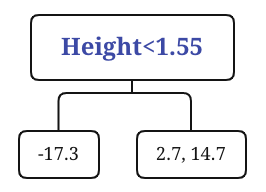

**Step 4: 计算每个样本的残差预测值**

右边的叶子（decision node）有两个残差值。这时候模型预测会直接对这两个残差值取平均：$\frac{2.7+14.7}{2} = 8.7$

为什么决策树会直接取这两个残差的均值作为最终预测？原因如下：

$$\gamma_{ib} = \min_{\gamma}{\sum_{x_i\in R_{ij}} {J(y_i,h_{b-1}(x_i)+\gamma)}}$$

- $h_{b-1}(x_i)+\gamma$ means that we take the errors of previous model into account
- $R_{ij}$ 是指第j棵树中的第i个叶子
- $h_{b-1}(x_i)$是上一棵树所做的预测值

我们将模型中叶子里的残差值一个一个带入到公式中：

$$\gamma_{ib} = \min_{\gamma}\frac{1}{2n}{\sum_{x_i\in R_{ij}} {(y_i - h_{b-1}(x_i)} - \gamma)^2}\\ 
\gamma_{1,1} = \min{\frac{1}{2}}(56-h_{b-1}(x_3)-\gamma)^2 \\
\frac{\partial}{\partial{\gamma}} = (56-h_{b-1}(x_3) + \gamma)\\
(56- 73.3 - \gamma) = 0\\
\gamma = -17.3
$$

同理，我们可以求出右边叶子的gamma值：

$$\gamma = \frac{14.7+2.7}{2} = 8.7$$

所以决策树最终的结果为：

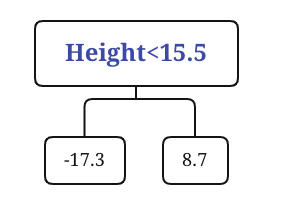

|Height|FavoriateColor|Gender|Weight|Prediction|Residual|Predicted Residual|
|------|------|------|------|------|------|------|
|1.6|Blue|Male|88|73.3|14.7|8.7|
|1.6|Green|Female|76|73.3|2.7|8.7|
|1.5|Blue|Female|56|73.3|-17.3|-17.3|


**Step 5: 更新模型**

$$h_{b}(x)  = h_{b-1}(x) + \lambda \gamma$$

在这里假设我们取learning rate为0.5，则新的目标变量值为：

$$
73.3 + 8.7\times0.5 = 77.65\\
73.3 + 2.7\times0.5 = 74.65\\
73.3 + -17.3\times0.5 = 64.65
$$

|Height|FavoriateColor|Gender|Weight|Prediction|New Prediction|
|------|------|------|------|------|------|
|1.6|Blue|Male|88|73.3|76.5|
|1.6|Green|Female|76|73.3|74.65|
|1.5|Blue|Female|56|73.3|64.65|

**Step 6: 从第二步开始重复**

直到增加新的决策树不能在减少error时，我们才停止种树。

##### Lab

Now we begin to build gradient boosting in Python using Scikit-Learn API. The lab includes the following topics:

- How to implement gradient boosting using python
- How to tune the hyperparameters for gradient boosting

###### Implementation of Gradient Boosting

**Regression**

To demonstrate how to build one gradient boosintg model, we first use `make_regression` function to construct a dataset about regression.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import make_regression
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

# crate the dataset
X,y = make_regression(n_samples=1000,n_features=20,n_informative=10,random_state=1)
# look at the shape
print(X.shape,y.shape)

(1000, 20) (1000,)


In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

# create the cross validator
cv = RepeatedKFold(n_splits=10,n_repeats=2,random_state=1)
# create a gradient boosting model
gbrt = GradientBoostingRegressor(learaning_rate=0.1)
# evaluate the model
cv_results = cross_val_score(gbrt,X,y,scoring="neg_mean_squared_error",cv=cv)

# display the mean squared error and variance
print(f"MSE: {round(-np.mean(cv_results),3)} ({round(np.std(cv_results),3)})")

MSE: 2092.429 (347.051)


**Classification**

In [50]:
from sklearn.datasets import make_classification

# crate the dataset
X,y = make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=1)
# look at the shape
print(X.shape,y.shape)

(1000, 20) (1000,)


In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# create the cross validator
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
# create a gradient boosting model
gbct = GradientBoostingClassifier(learning_rate=0.1)
# evaluate the model
cv_results = cross_val_score(gbct,X,y,scoring="accuracy",cv=cv)

# display the mean squared error and variance
print(f"MSE: {round(np.mean(cv_results),3)} ({round(np.std(cv_results),3)})")

MSE: 0.919 (0.028)


##### Hyperparameter Tuning

**The number of trees**

`n_estimators` corresponds to the number of trees we build in Gradient Boosting. As discussed above, Gradient Boosting sequentially build new trees, each one correcting errors of its predecessor. However, we need to determine how many trees can we build to get the best prediction. 

The number of trees is correlated with `learning_rate`. A smaller learning rate means more trees and more trees usually can generalize the information of train set better. 

Let's explore the change in performance with different number of trees.

In [78]:
def get_dataset():
    """Construct the dataset about binary problem"""
    X,y = make_classification(n_samples=1000,n_features=20,
               n_informative=15,n_redundant=5,random_state=1)
    return X,y

def build_models():
    """Build Adboost Model with different number of Trees"""
    models = dict()
    n_trees = [10,50,100,200,300,500,1000,2000]
    for n in n_trees:
        models[str(n)] = GradientBoostingClassifier(n_estimators=n)
    return models

def evaluate_models(model,X,y):
    """Evaluate the performance of Bagging Models"""
    cv_scores = cross_val_score(model,X,y,scoring="accuracy",cv=10)
    return cv_scores

# get the dataset
X, y = get_dataset()
# get models
gradient_models = build_models()
# evaluate models
results,names = [],[]
for name,model in gradient_models.items():
    names.append(name)
    results.append(evaluate_models(model,X,y))
    
# let's look at the results

for index,result in enumerate(results):
    print(f"Number of Trees {names[index]}: {round(np.mean(result),3)} {round(np.std(result),3)}")

Number of Trees 10: 0.832 0.016
Number of Trees 50: 0.897 0.015
Number of Trees 100: 0.918 0.015
Number of Trees 200: 0.925 0.013
Number of Trees 300: 0.924 0.017
Number of Trees 500: 0.929 0.016
Number of Trees 1000: 0.927 0.014
Number of Trees 2000: 0.925 0.012


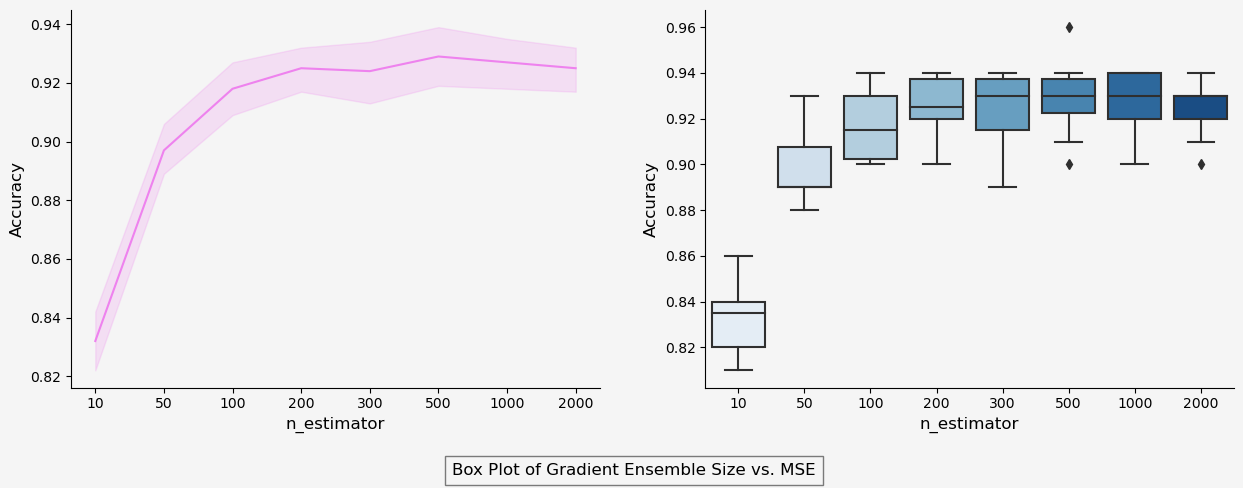

In [79]:
temp = pd.DataFrame(results).T
temp.columns = names
temp_melt = pd.melt(temp,value_vars=["10","50","100","200","300","500","1000","2000"],var_name="model",value_name="result")


# visualize the results
fig,ax = plt.subplots(1,2,figsize=(15,5),dpi=100,facecolor='whitesmoke')
sns.lineplot(data=temp_melt,x="model",y='result',estimator=np.mean,ax=ax[0],color="violet")
ax[0].set_facecolor("whitesmoke")
ax[0].set_xlabel('n_estimator',fontsize=12)
ax[0].set_ylabel('Accuracy',fontsize=12)
for spine in ["right",'top']:
    ax[0].spines[spine].set_visible(False)

sns.boxplot(data=temp_melt,x="model",y="result",palette="Blues",ax=ax[1])
ax[1].set_facecolor("whitesmoke")
ax[1].set_xlabel('n_estimator',fontsize=12)
ax[1].set_ylabel('Accuracy',fontsize=12)
for spine in ["right",'top']:
    ax[1].spines[spine].set_visible(False)

plt.figtext(0.5, -0.05, "Box Plot of Gradient Ensemble Size vs. MSE", ha="center", fontsize=12, bbox={"facecolor":"whitesmoke", "alpha":0.5, "pad":5})
plt.show()

The reduction in MSE becomes insignificant when we increase the tress from 500 to 1000. Hence, for this dataset, we probably just need 500 trees to perform the regression task.

**Number of Samples**



In [81]:
def get_dataset():
    """Construct the dataset about regression problem"""
    X,y = make_classification(n_samples=1000,n_features=20,
               n_informative=15,n_redundant=5,random_state=1)
    return X,y

def build_models():
    """Build gradient Model with different number of features"""
    models = dict()
    for n in np.arange(1,21):
        models[str(n)] = GradientBoostingClassifier(max_features=n)
    return models

def evaluate_models(model,X,y):
    """Evaluate the performance of Boosting Models"""
    cv_scores = cross_val_score(model,X,y,scoring="accuracy",cv=5)
    return cv_scores

# get the dataset
X, y = get_dataset()
# get models
gradient_models = build_models()
# evaluate models
results,names = [],[]
for name,model in gradient_models.items():
    names.append(name)
    results.append(evaluate_models(model,X,y))
    
# let's look at the results

for index,result in enumerate(results):
    print(f"Number of Features {names[index]}: {round(np.mean(result),3)} {round(np.std(result),3)}")

Number of Features 1: 0.872 0.018
Number of Features 2: 0.89 0.026
Number of Features 3: 0.912 0.016
Number of Features 4: 0.902 0.012
Number of Features 5: 0.905 0.019
Number of Features 6: 0.917 0.016
Number of Features 7: 0.914 0.011
Number of Features 8: 0.911 0.017
Number of Features 9: 0.925 0.012
Number of Features 10: 0.907 0.022
Number of Features 11: 0.915 0.009
Number of Features 12: 0.912 0.013
Number of Features 13: 0.919 0.011
Number of Features 14: 0.921 0.009
Number of Features 15: 0.921 0.017
Number of Features 16: 0.917 0.009
Number of Features 17: 0.912 0.011
Number of Features 18: 0.909 0.012
Number of Features 19: 0.91 0.014
Number of Features 20: 0.911 0.005


In [92]:
import plotly.express as px

temp = pd.DataFrame(results).T
temp.columns = [str(i) for i in np.arange(1,21)]
temp_melt = pd.melt(temp,value_vars=[str(round(i,1)) for i in np.arange(1,21)],var_name="model",value_name="result")

# visualize the results
fig = px.box(temp_melt, x = "model", y="result", points="all", notched=True,labels={"model":"max features",
                                                                                   "result":"accuracy"},
            title="Accuracy Versus Max_features")
fig.update_traces(quartilemethod="exclusive")
fig.show()

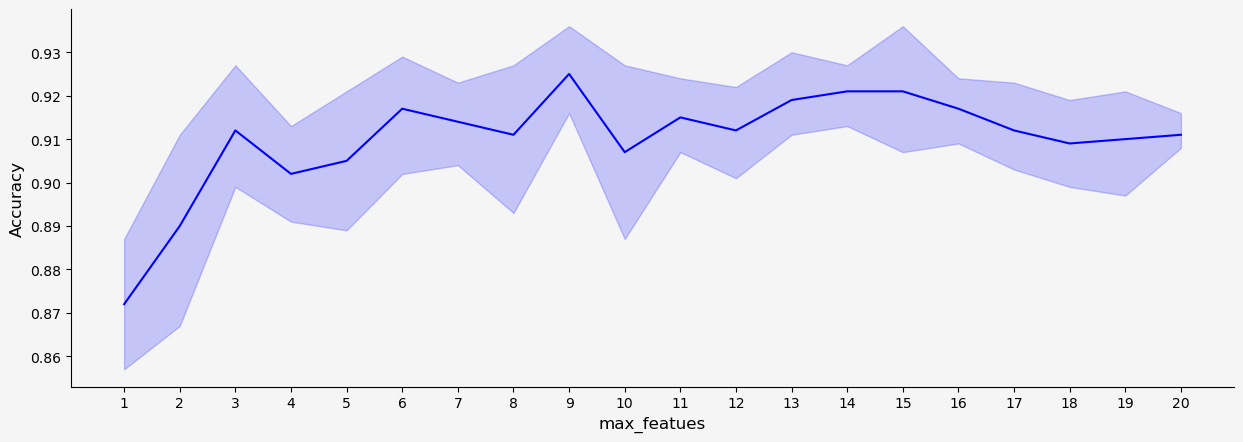

In [88]:
# visualize the results
fig,ax = plt.subplots(1,1,figsize=(15,5),dpi=100,facecolor='whitesmoke')
sns.lineplot(data=temp_melt,x="model",y='result',estimator=np.mean,ax=ax,color="blue")
ax.set_facecolor("whitesmoke")
ax.set_xlabel('max_featues',fontsize=12)
ax.set_ylabel('Accuracy',fontsize=12)
for spine in ["right",'top']:
    ax.spines[spine].set_visible(False)

The accuracy begins to fall and becomes flat when the number of features overceeds 9. In this case, 9 is probably the best value for max_feature, and a number larger than 9 may cause overfitting.

### Benefits and challenges of boosting 

There are a number of key advantages and challenges that the boosting method presents when used for classification or regression problems. 

**The key benefits of boosting include:**

- Ease of Implementation: Boosting can be used with several hyper-parameter tuning options to improve fitting.No data preprocessing is required, and boosting algorithms like have built-in routines to handle missing data. In Python, the scikit-learn library of ensemble methods (also known as sklearn.ensemble) makes it easy to implement the popular boosting methods, including AdaBoost, XGBoost, etc.  
- Reduction of bias: Boosting algorithms combine multiple weak learners in a sequential method, iteratively improving upon observations. This approach can help to reduce high bias, commonly seen in shallow decision trees and logistic regression models. 
- Computational Efficiency: Since boosting algorithms only select features that increase its predictive power during training, it can help to reduce dimensionality as well as increase computational efficiency.  

**The key challenges of boosting include:**

- **Overfitting:** There’s some dispute in the research (link resides outside IBM) around whether or not boosting can help reduce overfitting or exacerbate it. We include it under challenges because in the instances that it does occur, predictions cannot be generalized to new datasets.  
- **Intense computation:** Sequential training in boosting is hard to scale up. Since each estimator is built on its predecessors, boosting models can be computationally expensive, although XGBoost seeks to address scalability issues seen in other types of boosting methods. Boosting algorithms can be slower to train when compared to bagging as a large number of parameters can also influence the behavior of the model. 

### Applications of boosting  

Boosting algorithms are well suited for artificial intelligence projects across a broad range of industries, including:  

- **Healthcare:** Boosting is used to lower errors in medical data predictions, such as predicting cardiovascular risk factors and cancer patient survival rates. For example, research (link resides outside IBM) shows that ensemble methods significantly improve the accuracy in identifying patients who could benefit from preventive treatment of cardiovascular disease, while avoiding unnecessary treatment of others. Likewise, another study (link resides out IBM) found that applying boosting to multiple genomics platforms can improve the prediction of cancer survival time. 
- **IT:** Gradient boosted regression trees are used in search engines for page rankings, while the Viola-Jones boosting algorithm is used for image retrieval. As noted by Cornell (link resides outside IBM), boosted classifiers allow for the computations to be stopped sooner when it’s clear in which way a prediction is headed. This means that a search engine can stop the evaluation of lower ranked pages, while image scanners will only consider images that actually contains the desired object.   
- **Finance:** Boosting is used with deep learning models to automate critical tasks, including fraud detection, pricing analysis, and more. For example, boosting methods in credit card fraud detection and financial products pricing analysis (link resides outside IBM) improve the accuracy of analyzing massive data sets to minimize financial losses.  

**Reference:**

- [IBM](https://www.ibm.com/cloud/learn/boosting)
- [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/03/introduction-to-adaboost-algorithm-with-python-implementation/)
- [Hands on Machine Learning](http://index-of.es/Varios-2/Hands%20on%20Machine%20Learning%20with%20Scikit%20Learn%20and%20Tensorflow.pdf)